<a href="https://colab.research.google.com/github/sowmR/ML-LinearRegression/blob/main/LinearRegression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

**Formula:**

When there is only one feature (x) and one target(y)

y = mx+c

The above is the formula for line. m = slope/weight, c = intercept/bias.


There are multiple features:  x = [x1,x2,x3....xn]

y = b0+b1*x1+b2*x2....+bn*xn


**Pros:**

Very Simple to implement

Performs well on data with linear relationship

**Cons:**

Not suitable for data having non-linear relationship

Underfitting issue is possible

Sensitive to Outliers.

# Evaluation

The Following evaluation matrices are used to evaluate the efficiency of Linear model

#### Loss function: 

Loss function measures how far as predicted value is from the actual value. 

This will help in finding which parameter (weight, bias in this case) performs betters. 

Lower the loss function value, better the model will be. 


Loss = (1/n) * sum((yi - y`i)**2)

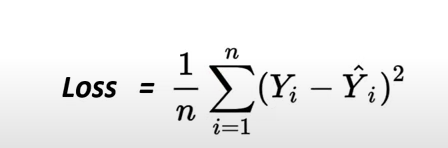







# optimization

determining best parameter for the model. 

In case of linear regression, optimization process should reduce the loss function so that the predicted value is more accurate. 


Gradient descent is the method used to optimize the linear regression model.


First, randomly initialize the parameters for the model (weight and bias in this case).

Then, change the parameter values through multiple iterations until a global minimum value is achieved. 

Formula for gradient descent:

weight = weight - L* Dw

bias = bias - L * Db

where,

L = Learning Rate,

Dw = Parital derivative of Loss function with respect to w

Db = Partial derivative of Loss function with respect to b


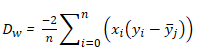





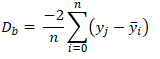



for a multivariant input, the formula is changed to 

w[i] = w[i] - L*Dw[i]

where , w[i] = i th weight.

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

In [30]:
dataset = pd.read_csv('./sample_data/insurance_costs.csv')
print(dataset.shape)
print(dataset.columns)

(1338, 6)
Index(['Unnamed: 0', 'age', 'sex', 'children', 'region', 'charges'], dtype='object')


In [31]:
dataset.drop('Unnamed: 0', axis=1,inplace=True)
features = list(dataset.columns)
target = 'charges'
print(features)
print(dataset.head(5))


['age', 'sex', 'children', 'region', 'charges']
   age     sex  children     region      charges
0   19  female         0  southwest  16884.92400
1   18    male         1  southeast   1725.55230
2   28    male         3  southeast   4449.46200
3   33    male         0  northwest  21984.47061
4   32    male         0  northwest   3866.85520


# Data Preprocessing

In [44]:
dataset = pd.get_dummies(dataset)
dataset.head(5)

,age,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,1,0,0,0,0,1
1,18,1,1725.55230,0,1,0,0,1,0
2,28,3,4449.46200,0,1,0,0,1,0
3,33,0,21984.47061,0,1,0,1,0,0
4,32,0,3866.85520,0,1,0,1,0,0


# Data Analysis

Analyse the data to understand the relation between features and target. 

In [33]:
# import seaborn as sns
# sns.pairplot(dataset,hue='charges')

In [34]:
targetData = list(dataset[target])
featureDf =  dataset.copy()
featureDf.drop(target,axis=1, inplace=True)
featureDf.shape

(1338, 8)

In [45]:
featureData = featureDf.values
x_train = featureData[:900]
y_train = targetData[:900]
x_test = featureData[1000:]
y_test = targetData[1000:]
print(len(x_train), len(y_train))
print(x_train[:5])

900 900
[[19  0  1  0  0  0  0  1]
 [18  1  0  1  0  0  1  0]
 [28  3  0  1  0  0  1  0]
 [33  0  0  1  0  1  0  0]
 [32  0  0  1  0  1  0  0]]


In [36]:
# Default parameters
learning_rate = 0.0003
epochs = 5

# model -1 : Python

In [37]:
class LinearRegressionModel:
  def __init__(self, learning_rate=0.3, epochs=10):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.lossValue = None
    self.optimalweight = None
    self.optimalbias = None
  
  def fit(self, x=[],y=[]):
    self.Sn = len(x) # number of samples
    self.Xn = len(x[0]) # number of features
    # init weight and bias
    self.wgt = np.zeros(self.Xn)
    self.bias = 0
    self.X = x
    self.Y = y
    print("Initial values: ",self.Sn,self.Xn,self.wgt, self.bias)
    for i in range(self.epochs):
      y_pred = self.predict(x)
      self.wgt = self.updated_weights(x,y,y_pred)
      self.bias = self.bias- (self.learning_rate* self.partialDerivativebias())  

  def updated_weights(self,x,y,y_pred):
    # weight = weight - L* dw
    newWeight = self.wgt.copy()
    for i in range(len(self.wgt)):
      newWeight[i] = newWeight[i]- (self.learning_rate* self.partialDerivativeWeight(i,x,y,y_pred))
    print("{}  ==>  {}".format(self.wgt, newWeight))
    return newWeight


  def partialDerivativeWeight(self,weightIndex=0, X=[], actual=[], predict =[]):
    result = 0
    sum =0
    n = len(actual)
    if (len(actual) != len(predict)) or n==0:
      return 0
    for i in range(len(actual)):
      sum = sum + (X[i][weightIndex]*(actual[i]-predict[i]))
    result = (-2/n)* sum
    return result

  def partialDerivativebias(self, actual=[], predict=[]):
    result = 0
    sum = 0
    n = len(actual)
    if (n!=len(predict)) or n==0:
      return 0
    for i in range(n):
      sum = sum + (actual[i]-predict[i])
    result = (-2/n)*sum
    return result

  def predict(self,X):
    n = len(X)
    y_pred = []
    _weight= self.wgt 
    _bias = self.bias
    for i in range(n):
      pred = _bias
      for j in range(self.Xn):
        pred = pred+ X[i][j] *_weight[j]
      y_pred.append(pred)
    return y_pred

  
  def meanSquaredError(self,actual=[],predict=[]):
    totalLoss = 0
    error = 0
    n = len(actual)
    if n == len(predict):
      for i in range(n):
        totalLoss = totalLoss + ((actual[i]-predict[i])**2)
      error = totalLoss/n
    return error

  def getParams(self):
    return {
        "weights":self.wgt,
        "bias":self.bias
    }

In [38]:
# train 
model = LinearRegressionModel(learning_rate, epochs)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
model1_err = mean_squared_error(y_test,y_pred)
print(model.getParams())

Initial values:  900 8 [0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 0. 0. 0. 0. 0. 0.]  ==>  [346.76051983   8.91852036   3.86755535   4.03510003   2.00847101
   1.70861516   2.42082332   1.76474589]
[346.76051983   8.91852036   3.86755535   4.03510003   2.00847101
   1.70861516   2.42082332   1.76474589]  ==>  [324.15812032   8.89195582   3.55001867   4.00191234   1.95141811
   1.48116016   2.584157     1.53519573]
[324.15812032   8.89195582   3.55001867   4.00191234   1.95141811
   1.48116016   2.584157     1.53519573]  ==>  [325.61397106   9.4475137    3.50510061   4.23363854   2.02888844
   1.37982572   2.89447452   1.43555047]
[325.61397106   9.4475137    3.50510061   4.23363854   2.02888844
   1.37982572   2.89447452   1.43555047]  ==>  [325.50281494   9.96464541   3.4424508    4.44803815   2.09758322
   1.27029226   3.19516193   1.32745154]
[325.50281494   9.96464541   3.4424508    4.44803815   2.09758322
   1.27029226   3.19516193   1.32745154]  ==>  [325.49373803  10.48377048   3.380981

# Model -2: Linear Regression model with numpy

In [39]:
class Linear_Regression2():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, epochs):

    self.learning_rate = learning_rate
    self.epochs = epochs


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.n_samples, self.n_features = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.weights = np.zeros(self.n_features)
    self.bias = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.epochs):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * np.sum((self.X.T).dot(self.Y - Y_prediction))) / self.n_samples

    db = - 2 * np.sum(self.Y - Y_prediction)/self.n_samples

    # upadating the weights
    tmp = self.weights
    self.weights = self.weights - self.learning_rate*dw
    self.bias = self.bias - self.learning_rate*db
    print("{}  ==>  {}".format(tmp,self.weights))

  def predict(self, X):
    return X.dot(self.weights) + self.bias

  
  def getParams(self):
    return {
        "weights":self.weights,
        "bias":self.bias
    }

In [40]:
x_tr = pd.DataFrame(x_train)
print(x_tr.shape)
model = Linear_Regression2(learning_rate,epochs)
model.fit(x_tr,y_train)
y_pred = model.predict(x_test)
model2_err = mean_squared_error(y_test,y_pred)
print(model.getParams())

(900, 8)
[0. 0. 0. 0. 0. 0. 0. 0.]  ==>  [371.48435095 371.48435095 371.48435095 371.48435095 371.48435095
 371.48435095 371.48435095 371.48435095]
[371.48435095 371.48435095 371.48435095 371.48435095 371.48435095
 371.48435095 371.48435095 371.48435095]  ==>  [290.60247096 290.60247096 290.60247096 290.60247096 290.60247096
 290.60247096 290.60247096 290.60247096]
[290.60247096 290.60247096 290.60247096 290.60247096 290.60247096
 290.60247096 290.60247096 290.60247096]  ==>  [308.20992325 308.20992325 308.20992325 308.20992325 308.20992325
 308.20992325 308.20992325 308.20992325]
[308.20992325 308.20992325 308.20992325 308.20992325 308.20992325
 308.20992325 308.20992325 308.20992325]  ==>  [304.3742442 304.3742442 304.3742442 304.3742442 304.3742442 304.3742442
 304.3742442 304.3742442]
[304.3742442 304.3742442 304.3742442 304.3742442 304.3742442 304.3742442
 304.3742442 304.3742442]  ==>  [305.20717126 305.20717126 305.20717126 305.20717126 305.20717126
 305.20717126 305.20717126 30

# Model 3: Linear Regression with scikit-learn model

In [41]:
from sklearn.linear_model import  LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(model.coef_)
print(model.intercept_)

[ 277.38036965  460.20339923 -470.72941369  470.72941369  325.34924273
 -952.87607029 1604.92220646 -977.3953789 ]
1617.8713444742498


In [42]:
model3_err =mean_squared_error(y_test,y_pred)
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  147475402.23093522


# compare Results

In [43]:
print("MSE")
print("model -1 - python = {}".format(model1_err))
print("model -2 - numpy = {}".format(model2_err))
print("model -3 - scikit learn = {}".format(model3_err))

MSE
model -1 - python = 153253247.34214312
model -2 - numpy = 151264824.17186326
model -3 - scikit learn = 147475402.23093522
